## CinRadar

### 粗略的查看绘图资源

height (366, 230)
(366, 230)
(366,)
(230,)
(366, 230)
(366, 230)


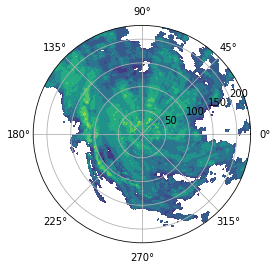

In [10]:
import cinrad
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
f = cinrad.io.CinradReader('Z_RADR_I_Z9576_20190810000600_O_DOR_SA_CAP.bin.bz2')
tilt_number = 0
data_radius = 230
data_dtype = 'REF' # stands for reflectivity
ra = f.get_data(tilt_number, data_radius, data_dtype)
print('height',ra.height.shape)
data = ra.data
values = data
print(values.shape)
azimuths = np.radians(np.linspace(0, 360, 366))
zeniths = np.arange(0, 230, 1)
print(azimuths.shape)
print(zeniths.shape)
r, theta = np.meshgrid(zeniths, azimuths)
print(r.shape)
print(theta.shape)
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.contourf(theta, r, values)

plt.show()


(15, 3)
height (366, 230)
(366, 230)
(366,)
(230,)
(366, 230)
(366, 230)


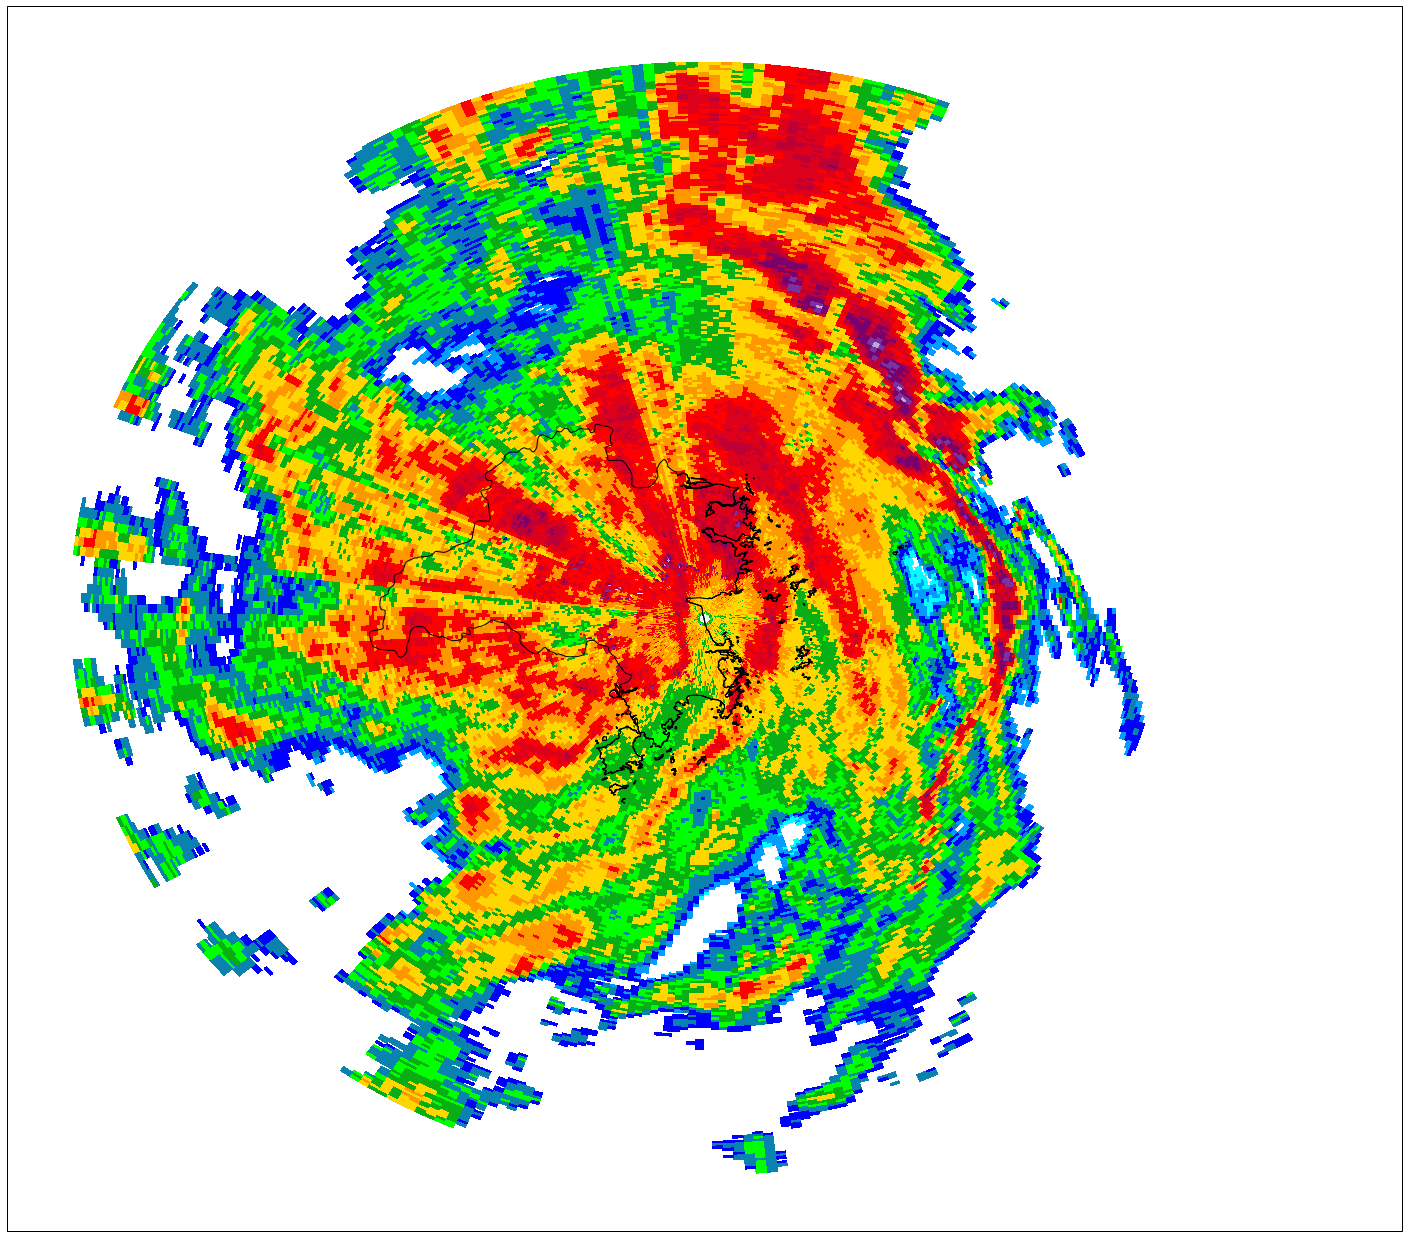

In [15]:
import cinrad
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
from matplotlib import cm, colors

fid = open('radar.rgb')
data=fid.readlines()
n=len(data);
#print(n)
rgb=np.zeros((n,3))
for i in np.arange(n):
    #print(data[0].split(' '))
    rgb[i][0]=float(data[i].split(' ')[0])
    rgb[i][1]=data[i].split(' ')[1]
    rgb[i][2]=data[i].split(' ')[2]
print((rgb.shape))
#print(rgb[253])
cmaps= colors.ListedColormap(rgb)


f = cinrad.io.CinradReader('Z_RADR_I_Z9576_20190810000600_O_DOR_SA_CAP.bin.bz2')
tilt_number = 0
data_radius = 230
data_dtype = 'REF' # stands for reflectivity
ra = f.get_data(tilt_number, data_radius, data_dtype)
print('height',ra.height.shape)
data = ra.data
values = data
print(values.shape)
azimuths = np.radians(np.linspace(0, 360, 366))
zeniths = np.arange(0, 230, 1)
print(azimuths.shape)
print(zeniths.shape)
r, theta = np.meshgrid(zeniths, azimuths)
print(r.shape)
print(theta.shape)
fig = plt.figure(figsize=(25, 25))
ax = plt.axes(projection=ccrs.PlateCarree())


#fig, ax = plt.subplots()
ax.pcolormesh(ra.lon, ra.lat, values,cmap=cmaps )
box = [120, 123, 27, 29]
scale = '10m'
#ax.coastlines(scale)

fname = 'taizhou.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(),  edgecolor='k', facecolor='none')
ax.add_feature(shape_feature)

plt.show()

# 绘制区域地图

/home/liyuan3970/.local/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/10m/physical/ne_10m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


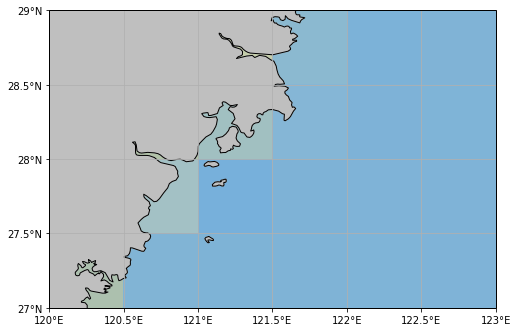

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

box = [120, 123, 27, 29]
scale = '10m'
xstep, ystep = 0.5, 0.5
fig = plt.figure(figsize=(8, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent(box, crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical', 'land', scale, edgecolor='face',
                                    facecolor=cfeature.COLORS['land'])
ax.add_feature(land, facecolor='0.75')
ax.coastlines(scale)


ax.stock_img()
# ===================================================
#标注坐标轴
ax.set_xticks(np.arange(box[0], box[1]+xstep,xstep), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(box[2], box[3]+ystep,ystep), crs=ccrs.PlateCarree())
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 添加网格线
ax.grid()
plt.show()

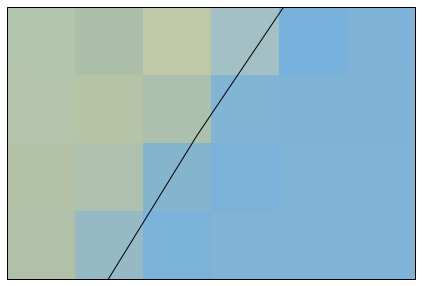

In [19]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.examples.arrows import sample_data


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([119, 122, 26, 28], crs=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()

x, y, u, v, vector_crs = sample_data(shape=(10, 14))

ax.contourf(ra.lat, ra.lon, values)
# ax.barbs(x, y, u, v, length=5,
#           sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
#           linewidth=0.95, transform=vector_crs)

plt.show()